In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

In [11]:
df = pd.read_csv('dulieuxettuyendaihoc.csv')

In [12]:
df

,MSSV,T1,T2,T3,T4,T5,T6,GT,DT,KV,NGONNGU,TOANLOGICPHANTICH,GIAIQUYETVANDE,KT,NGAYTHI,DINHHUONGNGHENGHIEP
0,SV001,7.2,8.4,7.4,7.2,7.4,6.9,F,NaN,2NT,3.25,3.25,4.50,A1,12/7/2018,No
1,SV002,5.4,6.3,4.3,4.9,3.0,4.0,M,NaN,1,6.00,4.00,3.50,C,12/7/2018,Yes
2,SV003,5.6,5.0,2.8,6.1,4.8,5.7,M,NaN,1,5.00,6.75,4.00,C,12/7/2018,No
3,SV004,6.6,5.1,5.9,4.1,6.1,7.4,M,NaN,1,4.25,4.25,5.25,D1,12/7/2018,No
4,SV005,6.0,5.4,7.6,4.4,6.8,8.0,M,NaN,2NT,4.25,4.50,5.00,A,12/7/2018,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,SV0096,8.6,8.9,7.7,6.7,7.9,6.6,F,NaN,1,5.25,1.50,6.25,C,7/20/2022,Yes
96,SV0097,3.7,4.1,3.1,3.4,5.5,5.7,F,NaN,1,5.25,3.75,4.75,C,7/20/2022,No
97,SV0098,8.8,9.5,9.5,8.5,9.0,8.5,M,NaN,2NT,7.00,8.00,4.00,C,7/20/2022,Yes
98,SV0099,2.7,2.8,6.2,5.2,4.1,4.3,M,NaN,1,5.00,3.50,5.50,C,7/20/2022,No


In [13]:
df=df[['NGONNGU','TOANLOGICPHANTICH','GIAIQUYETVANDE','DINHHUONGNGHENGHIEP']]

In [14]:
df.rename(columns={'TOANLOGICPHANTICH' : 'LOGIC',
                    'GIAIQUYETVANDE': 'UNGXU',
                    'DINHHUONGNGHENGHIEP' : 'DINHHUONG'}, inplace = True)

<ipython-input-14-60feb6e98eaa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'TOANLOGICPHANTICH' : 'LOGIC',


In [15]:
df

,NGONNGU,LOGIC,UNGXU,DINHHUONG
0,3.25,3.25,4.50,No
1,6.00,4.00,3.50,Yes
2,5.00,6.75,4.00,No
3,4.25,4.25,5.25,No
4,4.25,4.50,5.00,No
...,...,...,...,...
95,5.25,1.50,6.25,Yes
96,5.25,3.75,4.75,No
97,7.00,8.00,4.00,Yes
98,5.00,3.50,5.50,No


In [7]:
df

,NGONNGU,LOGIC,UNGXU,DINHHUONG
0,3.25,3.25,4.50,No
1,6.00,4.00,3.50,Yes
2,5.00,6.75,4.00,No
3,4.25,4.25,5.25,No
4,4.25,4.50,5.00,No
...,...,...,...,...
95,5.25,1.50,6.25,Yes
96,5.25,3.75,4.75,No
97,7.00,8.00,4.00,Yes
98,5.00,3.50,5.50,No


In [17]:
dinhhuong = pd.get_dummies(df['DINHHUONG'], drop_first=True)
df.drop('DINHHUONG', axis=1,inplace=True)
df=pd.concat([df,dinhhuong],axis=1)
df.head(5)

<ipython-input-17-850ca23b2bbb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('DINHHUONG', axis=1,inplace=True)


,NGONNGU,LOGIC,UNGXU,Yes
0,3.25,3.25,4.50,0
1,6.00,4.00,3.50,1
2,5.00,6.75,4.00,0
3,4.25,4.25,5.25,0
4,4.25,4.50,5.00,0


In [18]:
X = df[['NGONNGU', 'LOGIC','UNGXU']].values #input
y = df[['Yes']].values #output

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=16)

In [28]:
from sklearn.linear_model import LogisticRegression

# Initialize the classifier
classifier = LogisticRegression()

# Train the classifier using your training data
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_test = classifier.predict(X_test)



# from sklearn.linear_model import LogisticRegression

# model= linear_model.LogisticRegression()
# model.fit(X_train,y_train)
print(classifier.intercept_)
print(classifier.coef_)

[-1.29714816]
[[ 0.31978112 -0.04309514  0.02891314]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:

# Viết ra phương trình phần lớp

# z = -1.29714816+ 0.31978112*NGONNGU -0.04309514*LOGIC + 0.0.02891314*UNGXU

# p(x) = 1/(1+e^(-z))

# Ves = threshold(p(x) so với 0.5)

# #Với điểm ngôn ngữ là 7.5, logic là 6.5 và ứng xử là 5.0 thì sinh viên có định hướng hay không
# #đáp án: yes = ?
=0.96

# p(x) = 1/(1+e^(-z)) ==> 0.72 >0.5 =>> 1=>>yes

In [29]:
#Default threshold is 0.5
y_pred_test = classifier.predict(X_test)
y_pred_test

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0],
      dtype=uint8)

In [30]:
# cách xem các giá trị trc và sau khi di qua 1/(1+e^(-z))
print(classifier.predict_proba(X_test))
#0.56655505: Giá trị mô hình hồi quy tuyến tính là z
#0.43344492: Giá trị mô hình say khi đi qua hàm 1/(1+e^(-z))

[[0.54215376 0.45784624]
 [0.42686728 0.57313272]
 [0.56989436 0.43010564]
 [0.37434035 0.62565965]
 [0.45685782 0.54314218]
 [0.60701717 0.39298283]
 [0.64196612 0.35803388]
 [0.54218784 0.45781216]
 [0.68624869 0.31375131]
 [0.51592045 0.48407955]
 [0.41956957 0.58043043]
 [0.61315482 0.38684518]
 [0.41943042 0.58056958]
 [0.49065667 0.50934333]
 [0.42312774 0.57687226]
 [0.70106665 0.29893335]
 [0.46326149 0.53673851]
 [0.30601715 0.69398285]
 [0.65184076 0.34815924]
 [0.6123461  0.3876539 ]]


In [ ]:
# thay đổi threshold từ 0.5 lên 0.9 :

printf

In [35]:
result =pd.DataFrame({'Actual' : y_test.flatten(),'Predicted':y_pred_test})

result.head(5)

# sv danh gia mo hinh dua vao do do accuracy bang excel

# actual la thuc te ,predicted la du bao


# thuc te =1 ,du bao=0 ==> du bao sai

# thuc te =1 ,du bao=1 ==> du bao dung

# đếm số lượng dự báo đúng =>> phần trăm dự báo đúng

,Actual,Predicted
0,1,0
1,0,1
2,1,0
3,1,1
4,0,1


In [32]:
from sklearn.metrics import  accuracy_score
accuracy_score(y_test,y_pred_test)
# =>> nó ra số phần trăm mà dự báo đúng so với thực tế

0.35

In [37]:
from sklearn.metrics import  confusion_matrix

cf_matrix=confusion_matrix(y_test,y_pred_test)
cf_matrix
# dưới đây số giá trị dự báo đúng là tp:2,tn:5
# giá trị
# tp (ac=1,pre=1)=2
# fp (ac=0,pre=1)=7
# fn (ac=1,pre=0)=6
# tn (ac=0,pre=0)=5

array([[5, 7],
       [6, 2]])

Text(0.5, 1.0, 'predicted label ')

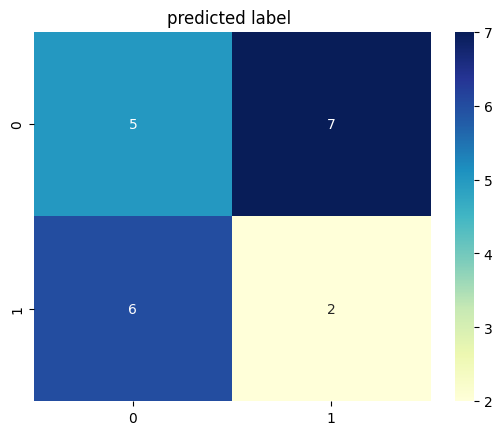

In [39]:
sns.heatmap(pd.DataFrame(cf_matrix),annot=True,cmap="YlGnBu",fmt='g')
plt.title('Confusion Matrix ',y=1.1)
plt.title('Actual label ')
plt.title('predicted label ')

In [ ]:
# Các độ đo đánh giá mô hình phân lớp
# N là số lượng mẫu =TP+FP+FN+TN
# TP,FP,FN,TN
# accuracy=(TP+TN)/(TP+FP+FN+TN)
# precision=TP/(TP+FP)
# RECALL=TP/(TP+TN)
# F1-SCORE=2*precision*RECALL/(precision+RECALL)

In [40]:
from sklearn.metrics import classification_report
target_names=['Not oriented','oriented']

print(classification_report(y_test,y_pred_test,target_names=target_names))

              precision    recall  f1-score   support

Not oriented       0.45      0.42      0.43        12
    oriented       0.22      0.25      0.24         8

    accuracy                           0.35        20
   macro avg       0.34      0.33      0.34        20
weighted avg       0.36      0.35      0.35        20

